In [1]:
import numpy as np
import netCDF4 as nc
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import MRD_v2 as MRD
import time as clk
import os

repertoire_courant=os.getcwd()
repertoire_figures=repertoire_courant+r"\\"+r"figures"+r"\\"

w_i=np.array([1,3,2,5,1,2,1,3])
phi_i=np.array([1,5,3,2,5,4,3,2])
print("test fonction MRD : ")
print(f"w_i:{w_i}")
print(f"phi_i{phi_i}")
print(f"MRD(w_i,phi_i) {MRD.MRD(w_i,phi_i,get_timescale=True)}")
print("test MRD_segments sur données TP CLA")
t0=clk.time()
print("chargement des données")
file_path=r'C:\\Users\evanl\Documents\TP_CLA\sonicdata_2023_03_10.nc.nc4'
r2 = nc.Dataset(file_path, 'r', format='NETCDF4')
#print(r2)
time=pd.to_datetime(r2['time'][:])
temp_csat=r2['temp_csat'][:]
w_csat=r2['w_csat'][:]
freq_ech=20.0
duree_segments='30min'#durée des segments EN MINUTES
N_ech_segments=int(duree_segments.strip('min'))*60*int(freq_ech)
tmin=np.datetime64("2023-10-06 23:00:00")
tmax=np.datetime64("2023-10-07 08:00:00")

def slice_segments(array,taille_segments,equals=True):
    N_a=len(array)
    #print(f"N_a : {N_a}")
    N_seg=N_a//taille_segments
    #print(f"N_seg {N_seg}")
    reste =N_a% taille_segments
    cpt=0
    res=[]
    while cpt <=N_seg:
        res.append(array[taille_segments*cpt:taille_segments*(cpt+1)])
        cpt+=1
        #print(f" cpt : {cpt}")
    if (reste!=0) and (equals==True): 
        res[-1]=np.append(res[-1],[np.nan for i in range(len(res[-1]),taille_segments)])
    return np.array(res)

serie_Ts=pd.Series(temp_csat,index=time,name="T").truncate(before=tmin,after=tmax)
serie_w=pd.Series(w_csat,index=time,name="w").truncate(before=tmin,after=tmax)
serie_u=pd.Series(u_csat,index=time,name="w").truncate(before=tmin,after=tmax)


Ts=slice_segments(serie_Ts.values,N_ech_segments)
print(f"segments Ts {Ts}")
w=slice_segments(serie_w.values,N_ech_segments)
print(f"fait en {clk.time() -t0} s")
print(f"nombre segments {len(Ts)}")

test fonction MRD : 
w_i:[1 3 2 5 1 2 1 3]
phi_i[1 5 3 2 5 4 3 2]
MRD(w_i,phi_i) ({'xy': array([ 0.125  , -0.21875, -0.1875 ]), 'xy_cum': array([ 0.125  , -0.09375, -0.28125]), 'temps': array([1., 2., 4.])}, {'x': array([1.125 , 0.3125, 0.25  ]), 'x_cum': array([1.125 , 1.4375, 1.6875]), 'y': array([1.1875  , 0.53125 , 0.140625]), 'y_cum': array([1.1875  , 1.71875 , 1.859375]), 'temps': array([1., 2., 4.])})
test MRD_segments sur données TP CLA
chargement des données
segments Ts [[8.653931 8.644501 8.6633   ... 8.111145 8.094635 8.070679]
 [8.063446 8.069946 8.092316 ... 8.233063 8.24118  8.254791]
 [8.23996  8.234741 8.238464 ... 8.312103 8.322052 8.369293]
 ...
 [7.327881 7.330078 7.327698 ... 7.502502 7.508484 7.514618]
 [7.491669 7.509338 7.442596 ... 7.742798 7.722473 7.715668]
 [7.715729      nan      nan ...      nan      nan      nan]]
fait en 7.096953630447388 s
nombre segments 19


In [2]:
print("calcul spectre MRD flux de chaleur vertical wTs")
t0=clk.time()
MRD_wT=MRD.MRD_segments(w,Ts,name=('w','Ts'),f_ech=freq_ech,bar_progress=True,filtrage=False,notebook=True)
#print(f"MRD_wT[0]['temps'] {MRD_wT[0]['temps']}")
#print(f"len(MRD_wT[0]['temps']) {len(MRD_wT[0]['temps'])}")

#print(f"MRD_wT[0]['wTs'][0] {MRD_wT[0]['wTs']}")
#print(f"len(MRD_wT[0]['wTs'][0]) {len(MRD_wT[0]['wTs'][0])}")

print(f"fait en {clk.time() -t0}")
t0=clk.time()
print("calcul des moyennes et des barres d'erreurs")
cospectre=MRD_wT[0]
spectres=MRD_wT[1]
cospectre_moy=MRD.spectre_moy(cospectre)
cospectre_med=MRD.spectre_median(cospectre)
#print(f" cospectre {cospectre}")
spectres_moy=MRD.spectre_moy(spectres)
spectres_med=MRD.spectre_median(spectres)
print(f"fait en {clk.time() -t0}")
print("tracé")

calcul spectre MRD flux de chaleur vertical wTs


  0%|          | 0/19 [00:00<?, ?it/s]

C:\Users\evanl\Documents\Stage IGE\MRD_v2.py:113: RuntimeWarning: Mean of empty slice
  x_split_moy=np.nanmean(x_split_m,axis=1)
C:\Users\evanl\Documents\Stage IGE\MRD_v2.py:114: RuntimeWarning: Mean of empty slice
  y_split_moy=np.nanmean(y_split_m,axis=1)


fait en 10.397124767303467
calcul des moyennes et des barres d'erreurs
fait en 0.8687176704406738
tracé


In [3]:
print(np.max(cospectre_moy['wTs']))
print(np.min(cospectre_moy['wTs']))
print(np.max(spectres_moy['w']))
def signe_pic(array):
    min_array=np.min(array)
    max_array=np.max(array)
    return  -1 if (np.abs(min_array) > np.abs(max_array)) else 1
print(signe_pic(cospectre_moy['wTs']))
print(signe_pic(spectres_moy['w']))
    

-8.473308294747303e-05
-0.004604718159441412
0.007411277403461733
-1
1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


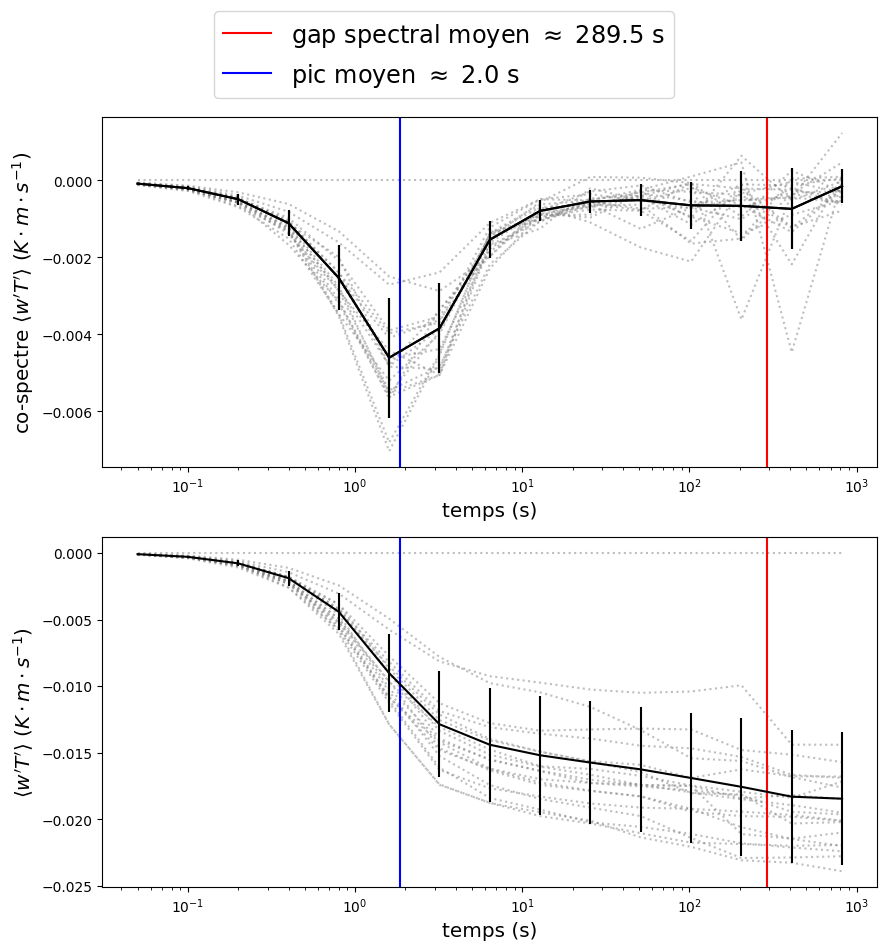

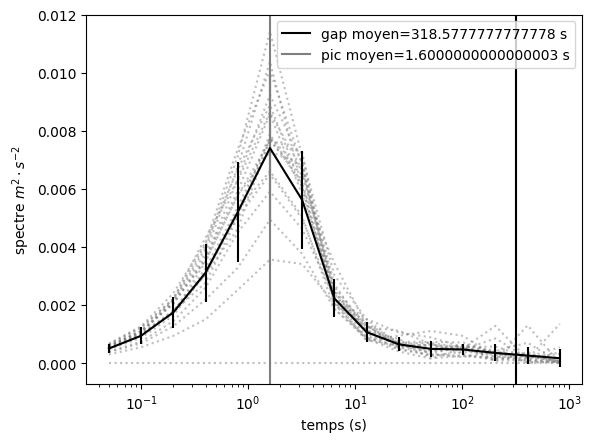

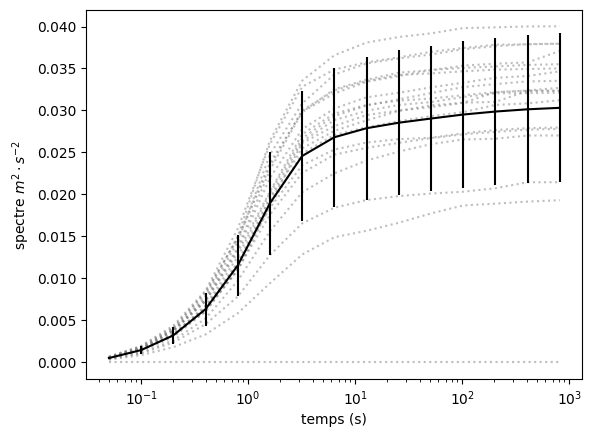

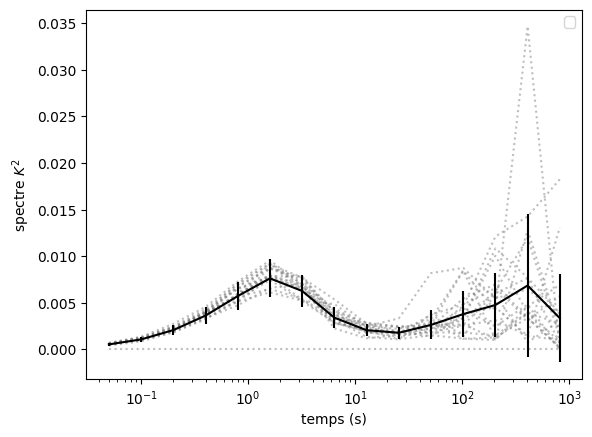

In [6]:
pic_cospectre_moy,gap_cospectre_moy=MRD.gap_spectral_moy(cospectre,'wTs')

#pic_cospectre,gap_cospectre=pic_spectral_algo(cospectre_moy['wTs'],cospectre_moy['wTs_cum'],cospectre_moy['temps'])
#pic_spectre,gap_spectre=pic_spectral_algo(spectres_moy['w'],spectres_moy['w_cum'],spectres_moy['temps'])

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(211)
MRD.plot_spectre_segments(cospectre,'wTs',xlabel='temps (s)')
MRD.plot_spectre(cospectre_moy,'wTs',ecolor='k',color='k',capthick=10)
plt.ylabel(r"co-spectre $\langle w'T'\rangle$ ($K\cdot m\cdot s^{-1}$)",fontsize='x-large')
plt.xlabel('temps (s)',fontsize='x-large')
#plt.axvline(gap_cospectre_moy,label="gap spectral="+str(np.round(gap_cospectre_moy,1))+" s", color='r')
#plt.axvline(pic_cospectre_moy,label="pic moyen="+str(np.round(pic_cospectre_moy))+" s", color='b')
plt.axvline(gap_cospectre_moy, color='r')
plt.axvline(pic_cospectre_moy, color='b')

#plt.legend()

#fig=plt.figure()
ax2=fig.add_subplot(212)
MRD.plot_spectre_segments(cospectre,'wTs_cum')
plt.xscale('log')
plt.xlabel('temps (s)')
plt.axvline(gap_cospectre_moy,label=r"gap spectral moyen $\approx$ {} s".format(np.round(gap_cospectre_moy,1)), color='r')
plt.axvline(pic_cospectre_moy,label=r"pic moyen $\approx$ {} s".format(np.round(pic_cospectre_moy)), color='b')

plt.xlabel('temps (s)',fontsize='x-large')
plt.ylabel(r"$\langle w'T' \rangle $ ($K\cdot m\cdot s^{-1}$)",fontsize='x-large')

fig.legend(loc='upper center',fontsize='xx-large')
plt.savefig(repertoire_figures+r"fig_MRD_TP.png")


#gap_spectre=new_gap_spectral(spectres_moy,'w')
pic_spectre_moy,gap_spectre_moy=MRD.gap_spectral_moy(spectres,'w')
fig=plt.figure()
MRD.plot_spectre_segments(spectres,'w',xlabel='temps (s)',ylabel=r"spectre $m^{2}\cdot s^{-2}$")
plt.xscale('log')
plt.xlabel('temps (s)')
plt.ylabel(r"spectre $m^{2}\cdot s^{-2}$")
plt.axvline(gap_spectre_moy,label="gap moyen="+str(gap_spectre_moy)+" s",color='k')
plt.axvline(pic_spectre_moy,label="pic moyen="+str(pic_spectre_moy)+" s",color='tab:gray')
#plt.axvline(pic_spectre,label="pic turbulence="+str(pic_spectre)+" s", color='k')
#plt.axvline(gap_spectre,label="gap="+str(gap_spectre)+" s",color='tab:gray')
plt.legend()

fig=plt.figure()
MRD.plot_spectre_segments(spectres,'w_cum',xlabel='temps (s)',ylabel=r"spectre $m^{2}\cdot s^{-2}$")
plt.xscale('log')
plt.xlabel('temps (s)')
plt.ylabel(r"spectre $m^{2}\cdot s^{-2}$")

fig=plt.figure()
MRD.plot_spectre_segments(spectres,'Ts',xlabel='temps (s)',ylabel=r"spectre $K^{2}$")
plt.xscale('log')
#plt.axvline(pic_spectre,label="pic turbulence="+str(pic_spectre)+" s", color='k')
#plt.axvline(gap_spectre,label="gap="+str(gap_spectre)+" s",color='tab:gray')
plt.legend()


In [5]:

fig=plt.figure()
plot_all(cospectre,'wTs',color='tab:gray',linestyle='dotted',alpha=0.5)
plot_spectre(cospectre_med,'wTs',ecolor='k',color='k',capthick=10)
plt.xscale('log')
plt.xlabel('temps (s)')
plt.ylabel(r"co_spectre $K\cdot m\cdot s^{-1}$")
plt.axvline(gap_cospectre_moy,label="gap="+str(gap_cospectre_moy)+" s")
plt.legend()

fig=plt.figure()
plot_all(cospectre,'wTs_cum',color='tab:gray',linestyle='dotted',alpha=0.5)
plot_spectre(cospectre_med,'wTs_cum',ecolor='k',color='k',capthick=10)
plt.xscale('log')
plt.xlabel('temps (s)')
plt.ylabel(r"flux $K\cdot m\cdot s^{-1}$")

fig=plt.figure()
plot_all(spectres,'w',color='tab:gray',linestyle='dotted',alpha=0.5)
plot_spectre(spectres_med,'w',ecolor='k',color='k',capthick=10)
plt.xscale('log')
plt.xlabel('temps (s)')
plt.ylabel(r"spectre $m^{2}\cdot s^{-2}$")
plt.axvline(gap_spectre_moy,label="gap="+str(gap_spectre_moy)+" s")
plt.legend()


fig=plt.figure()
plot_all(spectres,'w_cum',color='tab:gray',linestyle='dotted',alpha=0.5)
plot_spectre(spectres_med,'w_cum',ecolor='k',color='k',capthick=10)
plt.xscale('log')
plt.xlabel('temps (s)')

NameError: name 'plot_all' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
ax1=plt.subplot(111)
def plot_func(x,func,tracer=None,**kwargs):
    func_plot=plt.plot
    if isinstance(tracer,matplotlib.axes.Axes):
        func_plot=tracer.plot
    func_plot(x,func(x),**kwargs)
x=np.linspace(0,1)
f=lambda x:x**2
fig=plt.figure()
plot_func(np.linspace(0,1),lambda x:x**2)
fig=plt.figure()
plot_func(x,f,tracer=ax1)

In [ ]:
print(plt.plot)

In [ ]:
plot_spectre_segments(cospectre,'wTs')

In [ ]:
t=cospectre_moy['temps']
pic,gap=gap_spectral(cospectre_moy,'wTs')

interp=nppol.polyfit(t,cospectre_moy['wTs'],deg=4)

plt.plot(t,nppol.polyval(t,interp),color='r')
plot_spectre(cospectre_moy,'wTs',ecolor='k',color='k',capthick=10)
plt.xscale('log')

In [ ]:
import numpy.polynomial.polynomial as nppol
def gap_spectral_Voronovitch(spectre,index,tmax_turb=10.0,deg_interp=5):
    spectre_interp=nppol.polyfit(index,spectre,deg_interp)
    domaine_interp=nppol.polydomain([index[0],index[-1]])
def max_poly(poly, x):
    eval_poly=nppol.polyval(x,poly)

    

In [ ]:
import numpy.polynomial.polynomial as nppol
poly=nppol.Polynomial([1,1,1])
print(f"poly {poly}")

In [ ]:
def func(x):
    if x > 1:
        return x*func(x-1)
    else:return x
print(float(func(100)))

In [ ]:
def A(m,n,k):
    k+=1
    print(f"{k} eme execution")
    if m==0:
        return n+1
    else:
        if m>0 and n==0:
            return A(m-1,1,k)
        else:
            return A(m-1,A(m,n-1,k),k)
print(A(2,10,0))

In [ ]:
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from scipy.optimize import least_squares
poly_deg=lambda x,coefs:nppol.polyval(x,coefs)
z=np.linspace(0,10)
print(z)
print(poly_deg(z,(1,2,1)))
print(nppol.polyval((1,2,1),z))
plt.plot(z,poly_deg(z,np.flip([3,2,1])))
plt.plot(z,(lambda x:3*x**2+2*x+1)(z))

In [ ]:
deg = 2
args_deg=np.zeros(deg+1)
def func(x, *args_deg):
    print(args_deg)
    return nppol.polyval(x,args_deg)
print(func(z,1,2,1))
t_min=np.min(cospectre_moy['temps'][0])
t_max=np.max(cospectre_moy['temps'][0])
fit_cospectre=curve_fit(func,cospectre_moy['temps'],cospectre_moy['wTs'],bounds=(t_min,t_max))
plt.plot(cospectre_moy['temps'],cospectre_moy['wTs'])
plt.xscale('log')
    